In [1]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

import os
import sys
import numpy as np
import re
import scipy 
import matplotlib.patches as patches
import glob
import random 

In [8]:
#Out directory for generated plots
plotDir = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/results/Axelsson_CaganBlass/GenotypeMatrices/GenomePlots/'

#Non-overlap, Total callset
noTotal = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/Total_54callset_MxbRemoved/NoSliding/AutoXPar/village_wolf_mxb_rm_54callset_autoXpar_Hudson_Fst_200kbWindow.txt_filtered_windows_RofA_Fst_Zscores.txt'
#Overlap, Total callset
overTotal = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/Total_54callset_MxbRemoved/Sliding/AutoXPar/village_wolf_mxb_rm_54callset_autoXpar_Hudson_Fst_200kbWindow_50kbSlide.txt_filtered_windows_RofA_Fst_Zscores.txt'
#Per Site, Total callset
perTotal = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/Total_54callset_MxbRemoved/PerSite/Merged_VillageWolf_mxb_rm_PERSITE_54callset_AutoXParXNonPar_Hudson_Fst_PerSite_Zscores.txt'

#Reading into file array
fileArray = []
fileArray = [noTotal,overTotal,perTotal]

#Reading in CDR regions
cdrfile = '/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/results/Axelsson_CaganBlass/GenotypeMatrices/input/Merged_Axelsson_CaganBlass_canFam3.1.bed'

ROIarray = []
cdrFile = open(cdrfile, 'r')
for line in cdrFile:
    line = line.rstrip().split('\t')
    coord = line[0] + ':' + line[1] + '-' + line[2]
    ROIarray.append([coord, line[3]])

print('Processing %i CDRs' % (len(ROIarray)))

Processing 54 CDRs


In [22]:
#reading in intersections with our CDRs
intFile = open('/home/ampend/kidd-lab/ampend-projects/Angela/Re-RunningAnalysis_NewScripts/new_results/results/Axelsson_CaganBlass/results/Merged_IntersectKiddCDRs_with_Axelsson_AND_CaganBlass.txt','r')

intDict = {}
ints = []

for line in intFile:
    line=line.rstrip().split('\t')
    CDRchrom, CDRstart, CDRend, CDRid = line[0:4]
    intersect = line[7]
    if CDRid not in ints:
        ints.append(CDRid)
        intDict[CDRid] = []
        intersectList = []
        intDict[CDRid] = [CDRchrom, CDRstart, CDRend, CDRid,intersectList]
    intersectList.append(intersect)
    intDict[CDRid][4] = intersectList

print(intDict)

{'CDR34': ['chrX', '77050000', '77550000', 'CDR34', ['CB_7', 'CB_8', 'CB_9']], 'CDR35': ['chrX', '78250000', '78650000', 'CDR35', ['CB_7', 'CB_8', 'CB_9']], 'CDR36': ['chrX', '105500000', '105800000', 'CDR36', ['CB_13', 'CB_16', 'CB_18', 'CB_15', 'CB_17']], 'CDR1': ['chr1', '2300000', '3250000', 'CDR1', ['AX_40', 'AX_41', 'AX_39', 'CB_1', 'CB_2', 'CB_3', 'CB_4', 'CB_5']], 'CDR14': ['chr10', '3950000', '4150000', 'CDR14', ['AX_17']], 'CDR3': ['chr3', '18800000', '19050000', 'CDR3', ['AX_7']], 'CDR25': ['chr18', '2550000', '3750000', 'CDR25', ['AX_26']], 'CDR8': ['chr6', '46800000', '47350000', 'CDR8', ['AX_40', 'AX_41', 'AX_39', 'CB_1', 'CB_2', 'CB_3', 'CB_4', 'CB_5']], 'CDR19': ['chr14', '7200000', '7550000', 'CDR19', ['AX_20']], 'CDR2': ['chr1', '79800000', '80150000', 'CDR2', ['AX_4']], 'CDR32': ['chrX', '65900000', '66200000', 'CDR32', ['CB_6']], 'CDR37': ['chrX', '107800000', '110050000', 'CDR37', ['CB_13', 'CB_16', 'CB_18', 'CB_15', 'CB_17']], 'CDR4': ['chr4', '40800000', '4100000

In [6]:
##############################################################################################
def find_gene_pos():
    #GTF file with genes of interest:
    gtfFile = open('/home/ampend/kidd-lab/ampend-projects/BLAST2GO/ensembl_input/Canis_familiaris.CanFam3.1.81.gtf','r')

    #YOU NEED TO DO THIS BY HAND BY GREP'ING THE GTF FILE:
    #genesOfInterest = ['ENSCAFG00000028653','RNPC3','COL11A1']
    genesOfInterest = []
    genePos = []

    for line in gtfFile:
        if '#' in line:
            continue
        line=line.rstrip().split('\t')
        if 'exon' not in line[2]:
            continue
        chrom = 'chr' + line[0]
        start = int(line[3])
        end = int(line[4])
        if chrom == ROIchrom:
            if start >= ROIstart and end <= ROIend:
                #Finding gene ID in line
                geneInfo = line[8]
                if 'gene_name' in geneInfo:
                    geneInfo = geneInfo.split(';')
                    geneInfo = geneInfo[5].split(' ')
                    geneID = geneInfo[2].replace('"','')
                else:
                    geneInfo = geneInfo.split(';')
                    geneInfo = geneInfo[0].split(' ')
                    geneID = geneInfo[1].replace('"','')
                """for i in genesOfInterest:
                    if geneID == i:
                        genePos.append([geneID,start,end])"""
                if geneID not in genesOfInterest:
                    genesOfInterest.append(geneID)
                genePos.append([geneID,start,end])
            else:
                continue
        else:
            continue
    gtfFile.close()
    return genesOfInterest,genePos
###################################################################
##LONG## 
def get_data():
    index=-1
    for file in fileArray:
        index += 1
        inFile = open(file,'r')
        for line in inFile:
            if 'Chrom' in line or 'CHROM' in line:
                continue
            line = line.rstrip().split('\t')
            if 'PerSite' in file:
                chrom,start,end,Z = line[0],int(line[1]),int(line[1]),float(line[3])
            else:
                chrom,start,end, Z = line[0],int(line[1]),int(line[2]),float(line[9])
            #Now check if the call is within the ROI
            if chrom == ROIchrom and start >= ROIstart and end <= ROIend:
                if '50kbSlide' in file: #OVERLAP WINDOW FILE
                    midpoint = float(start + end)/2
                    SlideArray.append([chrom,midpoint,Z])
                    continue
                if 'PerSite' in file: #PER SITE WINDOW FILE
                    perSiteArray.append([chrom,start,Z])
                    continue
                else: #NO OVERLAP WINDOW FILE
                    midpoint = float(start + end)/2
                    NoSlideArray.append([chrom,midpoint,Z])
                    continue                
                #outFile.write('%s\t%s\t%s\t%s\n' % (chrom,start,end,Z)) 
        inFile.close()
    return SlideArray,perSiteArray,NoSlideArray
####################################################################################
def get_fst():
    ##LONG## 
    index=-1
    perSiteArray, SlideArray, NoSlideArray = [] , [], []
    for file in fileArray:
        index += 1
        inFile = open(file,'r')
        for line in inFile:
            if 'Chrom' in line or 'CHROM' in line:
                continue
            line = line.rstrip().split('\t')
            if 'PerSite' in file:
                chrom,start,end,Z = line[0],int(line[1]),int(line[1]),float(line[3])
            else:
                chrom,start,end, Z = line[0],int(line[1]),int(line[2]),float(line[9])
            #Now check if the call is within the ROI
            if chrom == ROIchrom and start >= ROIstart and end <= ROIend:
                if '50kbSlide' in file: #OVERLAP WINDOW FILE
                    midpoint = float(start + end)/2
                    SlideArray.append([chrom,midpoint,Z])
                    continue
                if 'PerSite' in file: #PER SITE WINDOW FILE
                    perSiteArray.append([chrom,start,Z])
                    continue
                else: #NO OVERLAP WINDOW FILE
                    midpoint = float(start + end)/2
                    NoSlideArray.append([chrom,midpoint,Z])
                    continue                
    return perSiteArray, SlideArray, NoSlideArray
##############################################################################
def thin_snps():
    #THIS THINS THE MASSIVE LIST OF PER SITE ZFST VALUES
    percentage = float(50)
    k = int(len(perSiteArray) * percentage // 100)
    indices = random.sample(xrange(len(perSiteArray)), k)
    thinned_perSiteArray = [perSiteArray[i] for i in indices]
    return thinned_perSiteArray
#############################################################################
def determine_sig(NoSlideArray,SlideArray):
    passes = False
    plotArray = []
    for i in range(0,len(SlideArray)):
        x, y, width = SlideArray[i][1], SlideArray[i][2], 15000
        if y > 5:
            passes = True
    if passes == False:
        plotArray = NoSlideArray
        barColor = "green"
    else: 
        plotArray = SlideArray
        barColor = "red"
    return plotArray, barColor
#############################################################################
def draw_plot(ROIchrom,ROI_CDR, SlideArray, NoSlideArray,perSiteArray):
    plt.figure(figsize=(14,6))
    #plotArray, barColor = determine_sig(NoSlideArray,SlideArray)
    yMax = 8.5
    #sliding window
    for i in range(0,len(SlideArray)):
        x, y, width = SlideArray[i][1], SlideArray[i][2], 15000
        if y > 5:
            plt.bar(x, y, width, color="red",alpha=0.6,linewidth=1)
            if y > yMax:
                yMax = y
        if 'chrX' in ROIchrom and y > 3:
            plt.bar(x, y, width, color="red",alpha=0.6,linewidth=1)
            if y > yMax:
                yMax = y  
        else:
            plt.bar(x, y, width, fill=False,alpha=0.6,linewidth=1)
    #NO sliding window
    for i in range(0,len(NoSlideArray)):
        x, y, width = NoSlideArray[i][1]-15000, NoSlideArray[i][2], 15000
        if y > 5:
            plt.bar(x, y, width, color="green",alpha=0.6,linewidth=1)
            if y > yMax:
                yMax = y  
        if 'chrX' in ROIchrom and y > 3:
            plt.bar(x, y, width, color="red",alpha=0.6,linewidth=1)
            if y > yMax:
                yMax = y 
        else:
            plt.bar(x, y, width, fill=False,alpha=0.6,linewidth=1)
    #SNPs
    for i in range(0,len(perSiteArray)):
        x,y =perSiteArray[i][1],perSiteArray[i][2]
        if y > 5:
            plt.scatter(x,y,facecolor='red',edgecolor='k',s=20)
            if y > yMax:
                yMax = y
        if 'chrX' in ROIchrom and y > 3:
            plt.bar(x, y, width, color="red",alpha=0.6,linewidth=1)
            if y > yMax:
                yMax = y 
        else:
            plt.scatter(x,y,color='black',alpha=0.8,s=10)

    ax = plt.axes()
    #DRAwING GENE MODELS
    ###mp = []
    IDheights=[-3.5,-4.5,-5.5,-6.5,-7.5,-8.5]
    geneheights=[-3,-4,-5,-6,-7,-8]
    index = -1
    for gene in genesOfInterest:
        xRange = []
        #determines height to print the genes and gene IDs
        if index == 5:
            index = 0
        else:
            index += 1
        for i in range(0,len(genePos)):
            if gene == genePos[i][0]:
                x = genePos[i][1]
                length = genePos[i][2]-genePos[i][1]
                #ax.add_patch(patches.Rectangle((x, -3),length,0.75,facecolor="black"))
                ax.add_patch(patches.Rectangle((x,geneheights[index]),length,0.75,facecolor="black"))
                xRange.append(x)
        xMin,xMax = min(xRange),max(xRange)
        plt.hlines(y=geneheights[index]+0.4, xmin=xMin, xmax=xMax,lw=1,color="black")
        #ADDING GENE TEXT
        if 'ENSCAFG' in gene:
            gene = gene.replace('ENSCAFG','ENS')
        if xMax < ROIend-10000: #Make sure the gene ID doesn't get printed off the plot
            ax.text(xMax+2500,geneheights[index]+0.3,gene,fontsize=7)
    #DEFINING AXIS LIMS
    plt.ylim(geneheights[index]-1,yMax)
    plt.xlim(ROIstart,ROIend)
    #ADDING TITLES
    plt.xlabel('Chromosome %s Position' % ROIchrom,fontsize=20)
    plt.ylabel(r'$ZF_{ST}$',fontsize=20)
    #Add CDR window
    CDR = [ROIstart+210000,ROIend-210000]
    ax.add_patch(patches.Rectangle((CDR[0], -1.75),(CDR[1]-CDR[0]),0.5,fill=None))
    ax.text(((ROIstart+ROIend)/2-10000), -1.7,str(ROI_CDR))
    ax.ticklabel_format(useOffset=False,style='plain')#turn off sci-notation in  xaxis labelling
    plt.savefig(plotDir + ROI_CDR + 'Locus_ZFstPlotWithGeneModels.png')

chr1:2515608-3315787
Looking for the Fst information for these coordinates: chr1 2305608 3525787

Genes of Interest in Region of Interest:
 ['SNORA70', 'GALR1', 'MBP', 'ZNF236', 'U6', 'ZNF516']
chr1:46572800-46874590
Looking for the Fst information for these coordinates: chr1 46362800 47084590

Genes of Interest in Region of Interest:
 ['ARID1B', 'TMEM242', 'ENSCAFG00000028896', 'ZDHHC14']
chr1:63560426-63760428
Looking for the Fst information for these coordinates: chr1 63350426 63970428

Genes of Interest in Region of Interest:
 ['NKAIN2', 'RNF217']
chr1:79948273-80148387
Looking for the Fst information for these coordinates: chr1 79738273 80358387

Genes of Interest in Region of Interest:
 ['ENSCAFG00000030357', 'U7']
chr3:15326157-15626159
Looking for the Fst information for these coordinates: chr3 15116157 15836159

Genes of Interest in Region of Interest:
 ['KIAA0825', 'FAM172A', '7SK', 'ENSCAFG00000008096']
chr3:18623348-18823350
Looking for the Fst information for these coordin

/sw/lsa/centos7/python-anaconda-arc-connect/latest/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


chr17:38657284-38857286
Looking for the Fst information for these coordinates: chr17 38447284 39067286

Genes of Interest in Region of Interest:
 ['RMND5A', 'RNF103', 'ENSCAFG00000007479', 'KDM3A', 'REEP1', 'MRPL35', 'IMMT', 'SNORA51', 'PTCD3', 'SNORD94', 'POLR1A']
chr18:414502-1414626
Looking for the Fst information for these coordinates: chr18 204502 1624626

Genes of Interest in Region of Interest:
 ['ABCA13', 'ENSCAFG00000031496', 'ENSCAFG00000024474', 'ENSCAFG00000030239', 'VWC2', 'ZPBP', 'ENSCAFG00000003358', 'SNORA7', 'ENSCAFG00000029400']
chr18:3217603-4718037
Looking for the Fst information for these coordinates: chr18 3007603 4928037

Genes of Interest in Region of Interest:
 ['7SK', 'U1', 'ENSCAFG00000003455']
chr19:37683163-37883157
Looking for the Fst information for these coordinates: chr19 37473163 38093157

Genes of Interest in Region of Interest:
 ['TMEM163', 'ACMSD', 'ENSCAFG00000031430', 'CCNT2', 'MAP3K19', 'RAB3GAP1', 'ZRANB3']
chr22:19995751-20192912
Looking for th

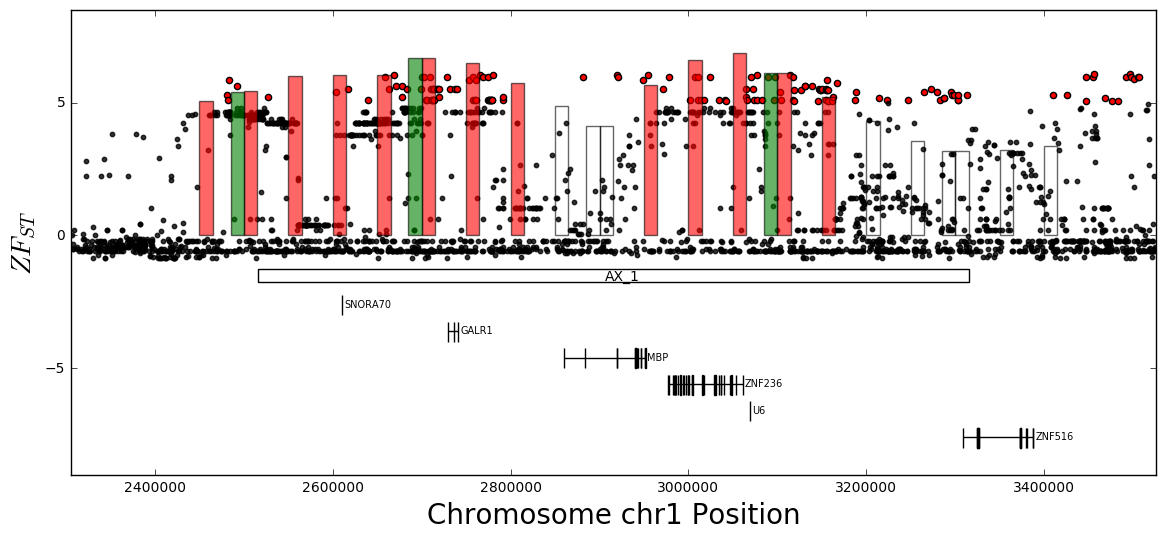

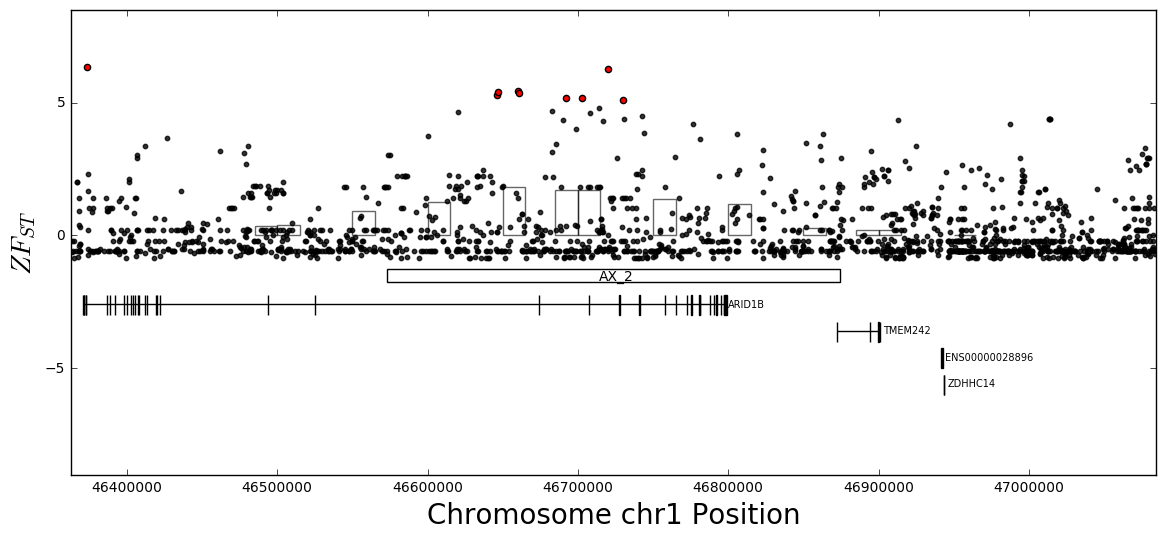

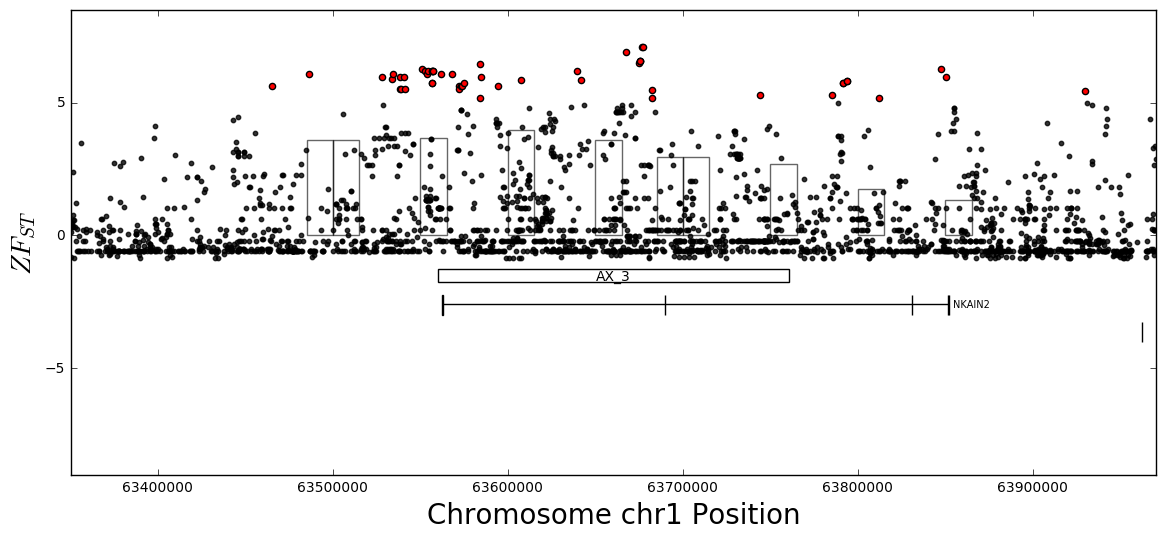

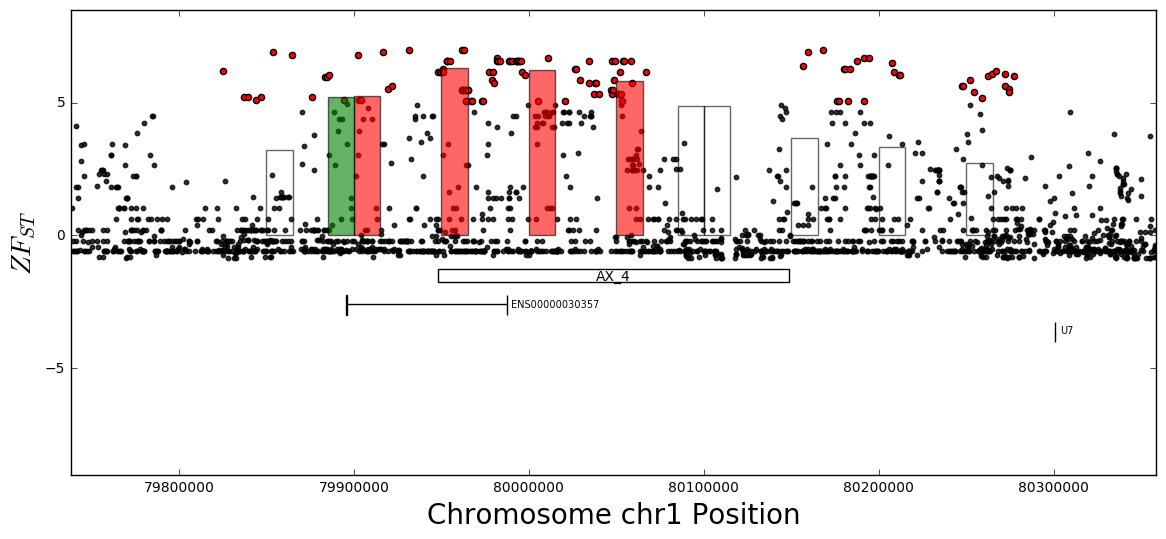

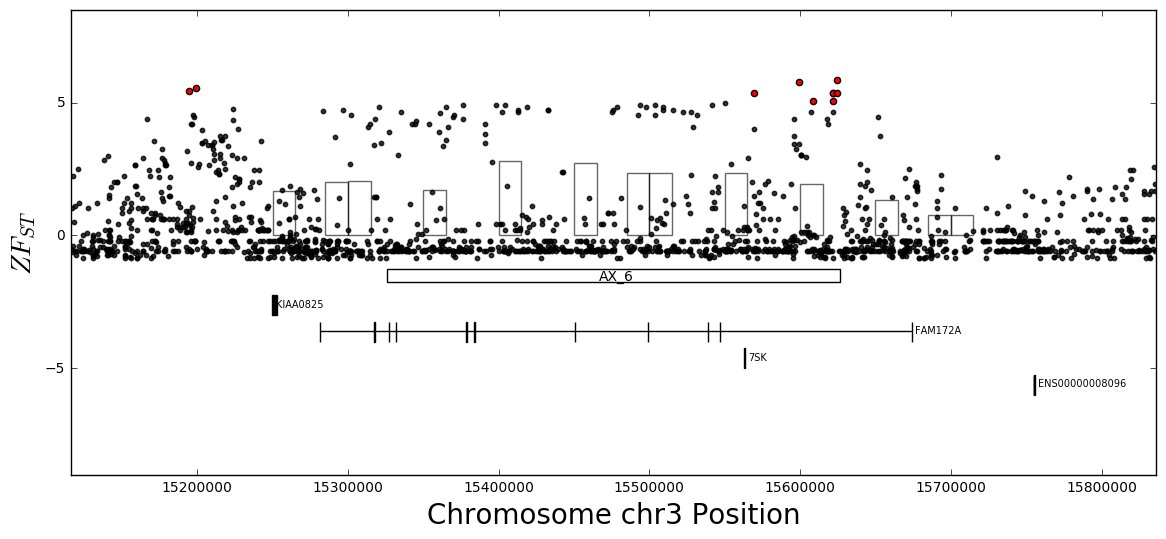

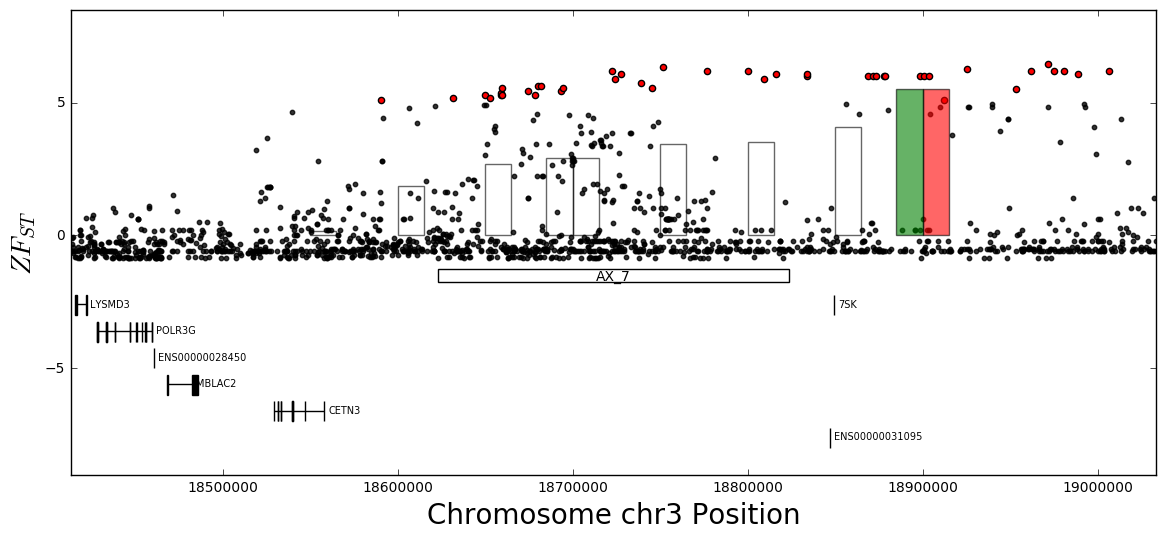

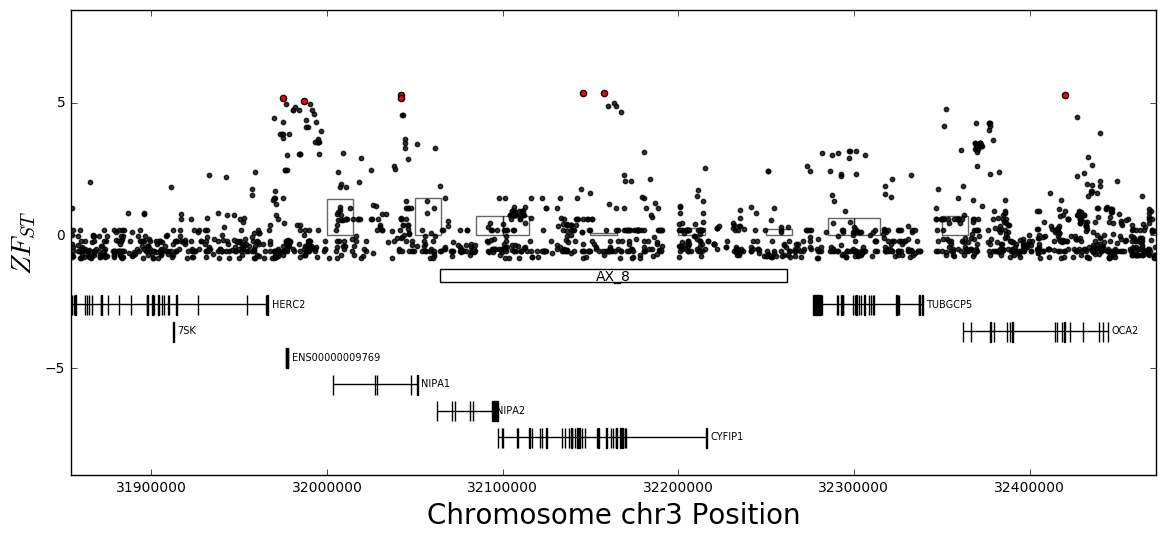

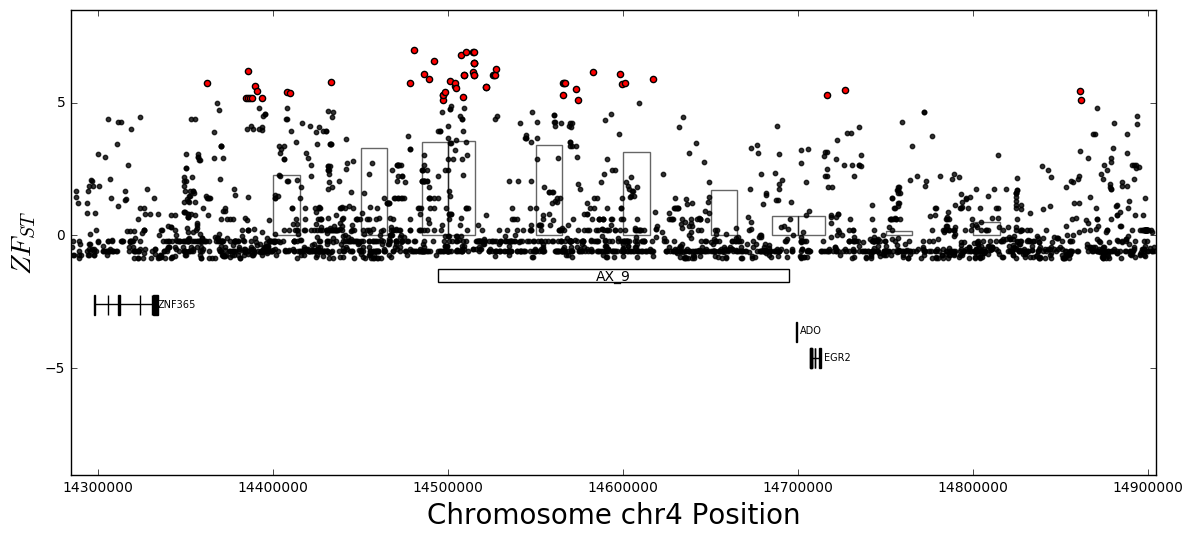

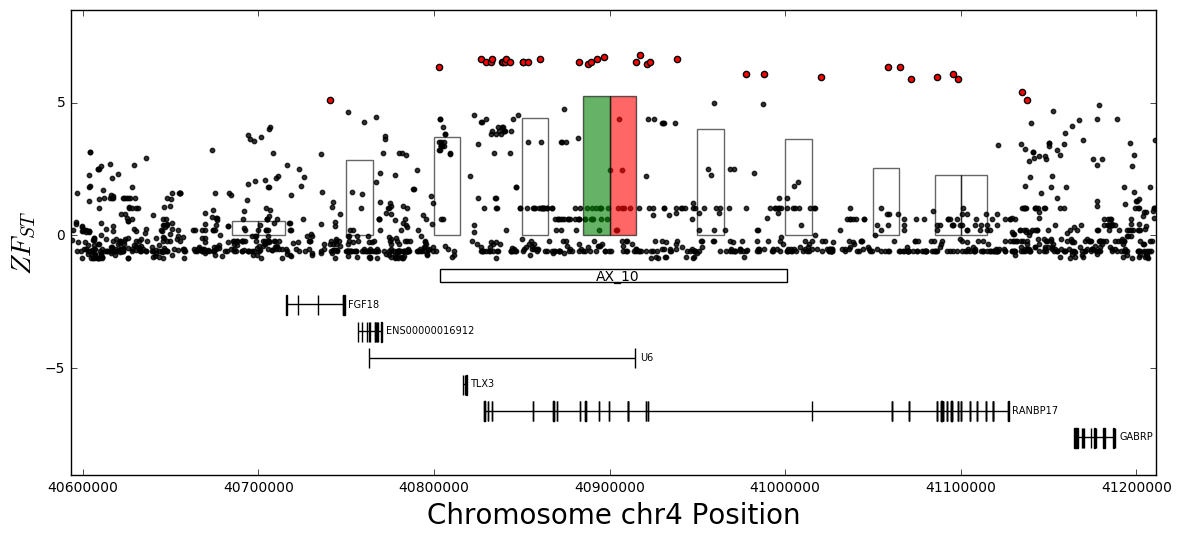

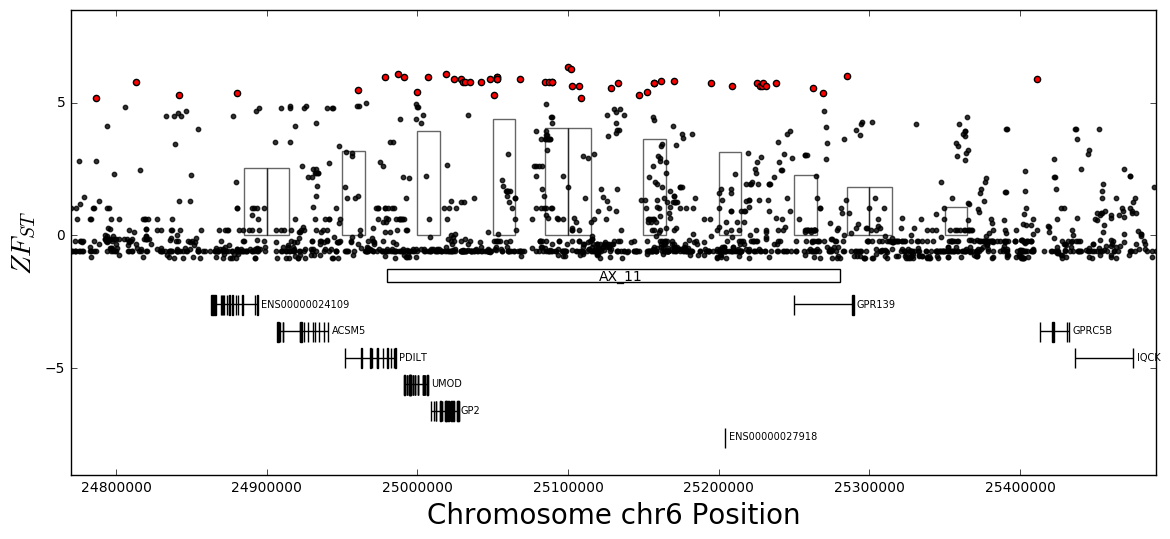

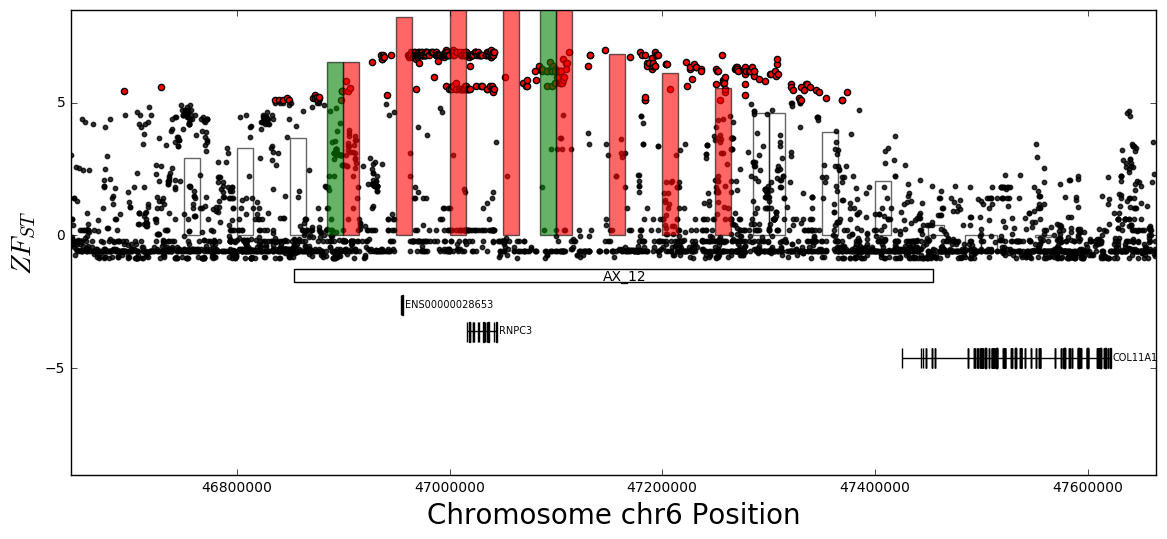

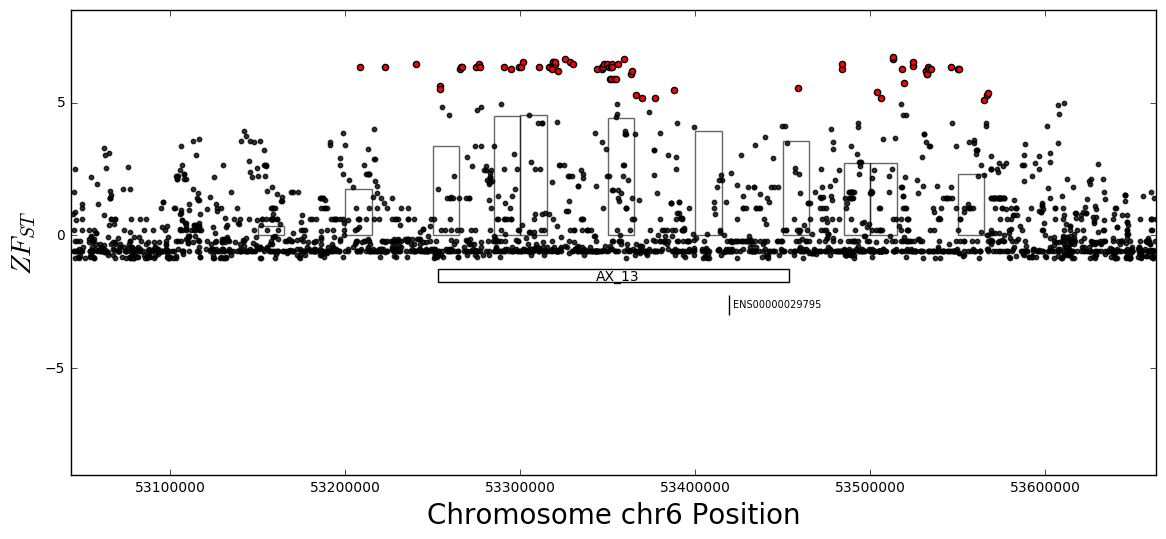

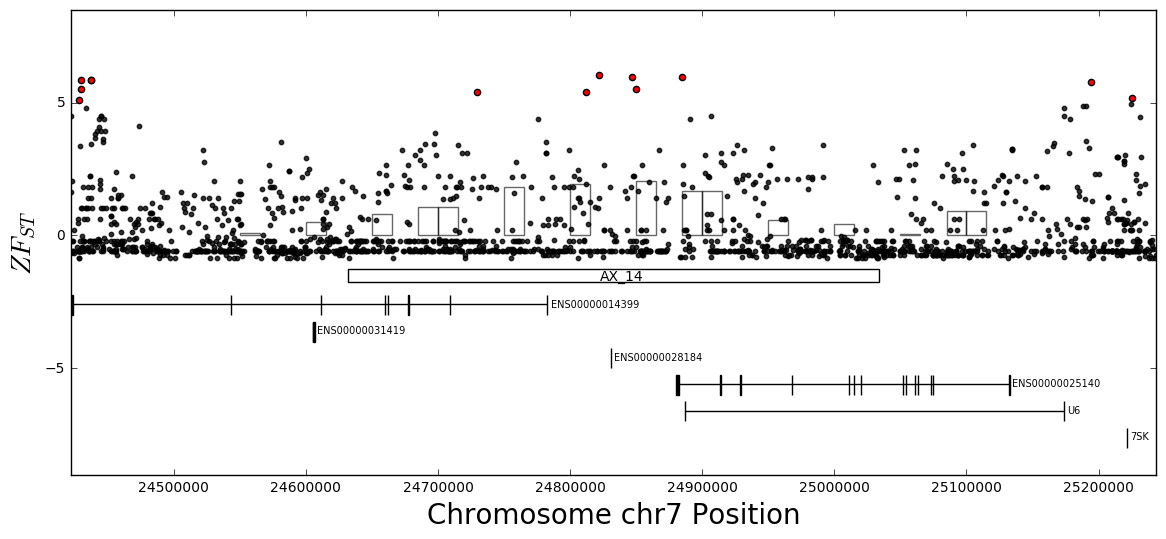

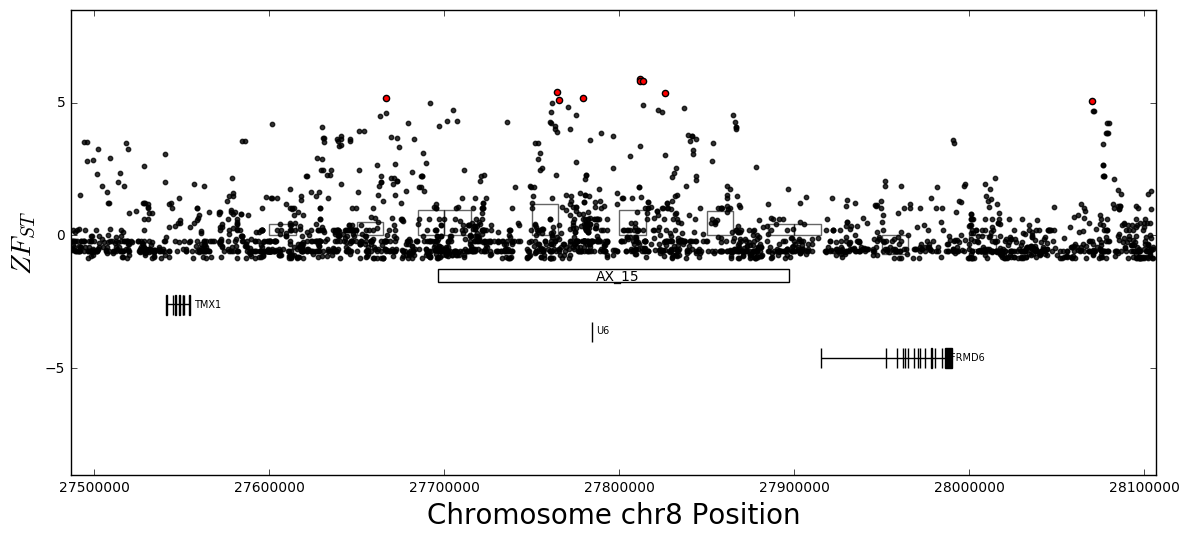

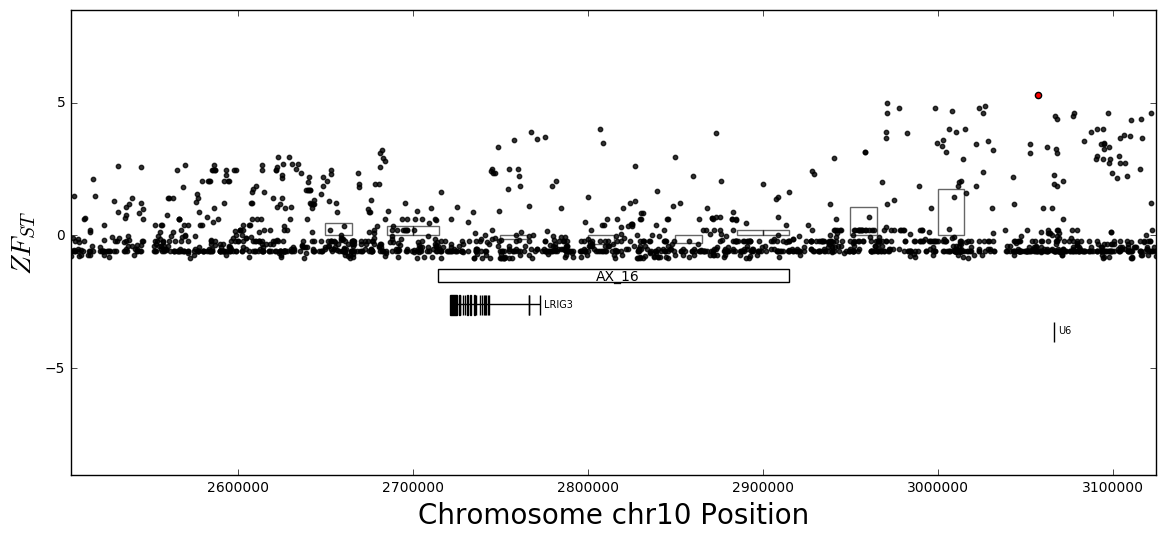

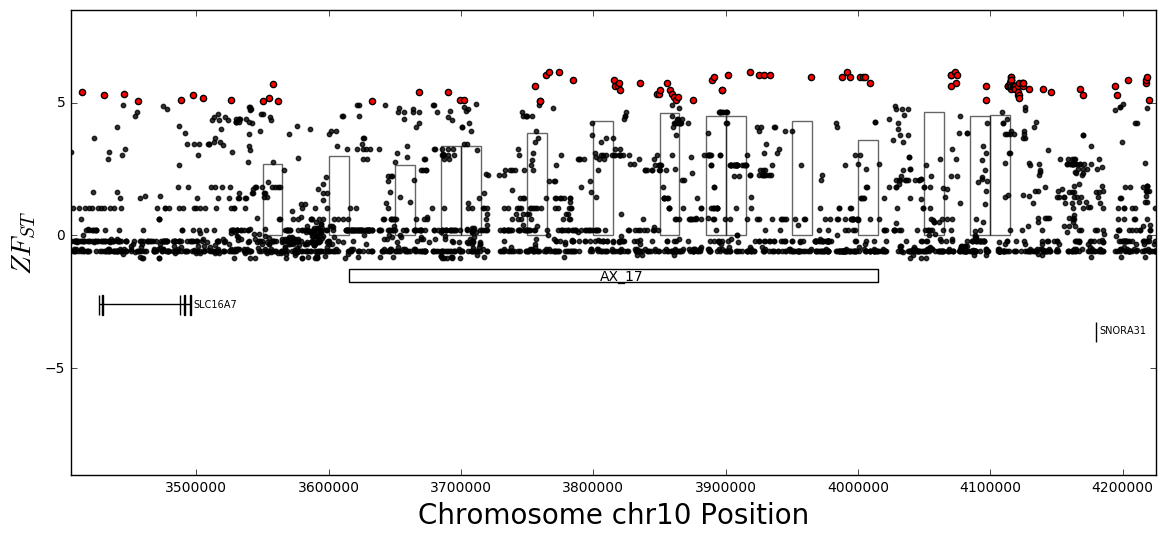

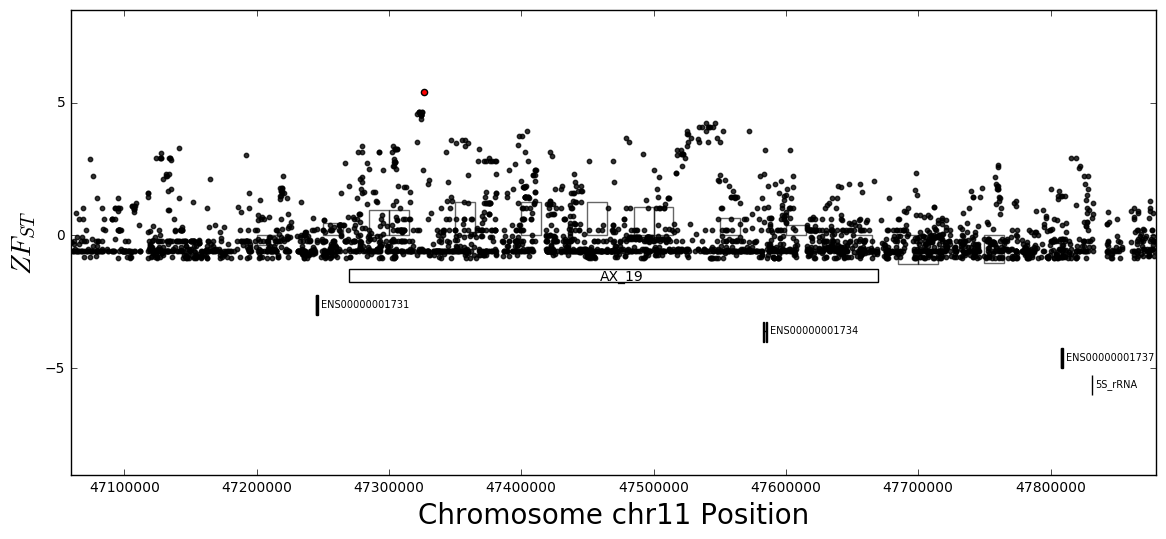

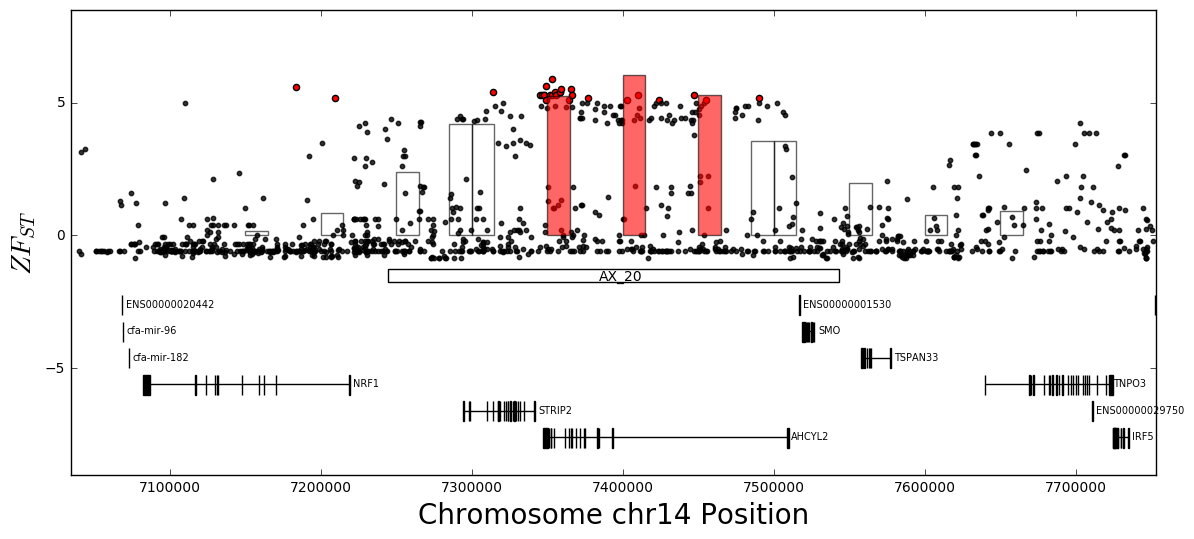

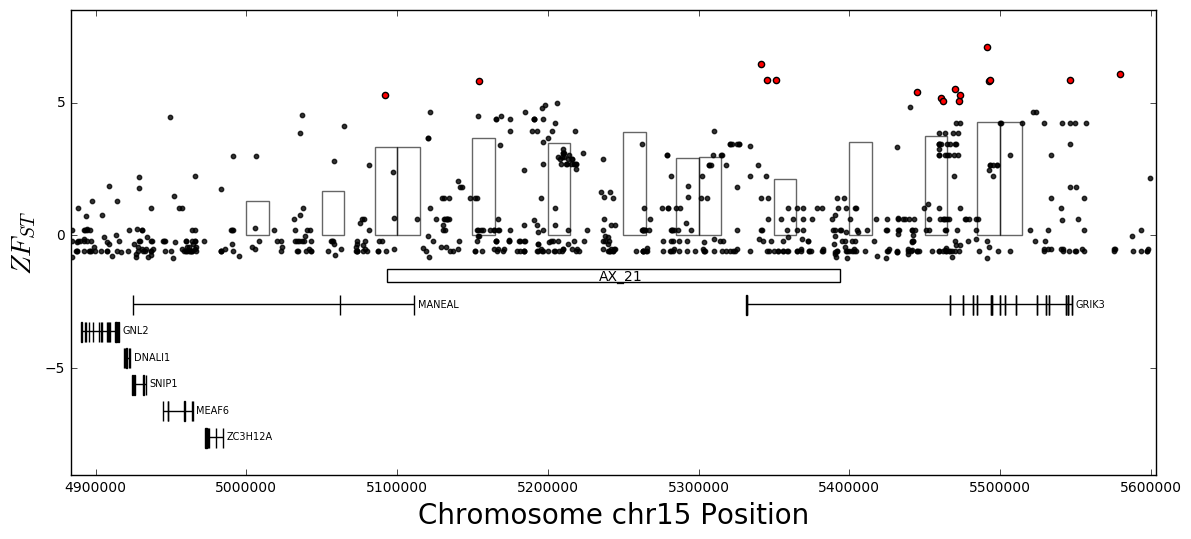

In [ ]:
for i in range(0,len(ROIarray)):
    ROI =  ROIarray[i][0]
    print(ROI)
    ROIchrom,pos = ROI.split(':')
    ROI_CDR = ROIarray[i][1]
    if 'chrX' not in ROIchrom:
        continue
    ROIstart,ROIend = pos.split('-')
    ROIstart,ROIend = int(ROIstart)-210000,int(ROIend)+210000

    print('Looking for the Fst information for these coordinates:',ROIchrom,ROIstart,ROIend)
    #Finding genes in the region
    genesOfInterest = []
    genePos = []
    genesOfInterest,genePos = find_gene_pos()

    print('\nGenes of Interest in Region of Interest:\n', genesOfInterest)
    
    perSiteArray, SlideArray, NoSlideArray = get_fst()
    #thinned_perSiteArray = thin_snps()
    #perSiteArray = thinned_perSiteArray
    #length = len(thinned_perSiteArray)
    #print '%i SNPs went are found in this region' % length
    draw_plot(ROIchrom,ROI_CDR, SlideArray, NoSlideArray,perSiteArray)

    